**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


Import required libraries. Pandas and NumPy are used for data handling. Matplotlib and Seaborn are used for visualization. Scikit-learn is used to build and evaluate the classification model

**Load Dataset**

In [5]:
df = pd.read_csv("/content/drive/MyDrive/HeartDiseaseTrain-Test.csv")
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


Load the Heart Disease dataset and display the first few rows to understand its structure

**Data Inspection**

In [6]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.info()
df.describe()

Shape: (1025, 14)

Missing Values:
 age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   in

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


Check the number of rows and columns.Check for missing values and also view data types and summary statistics to understand the dataset

**Exploratory Data Analysis (EDA)**

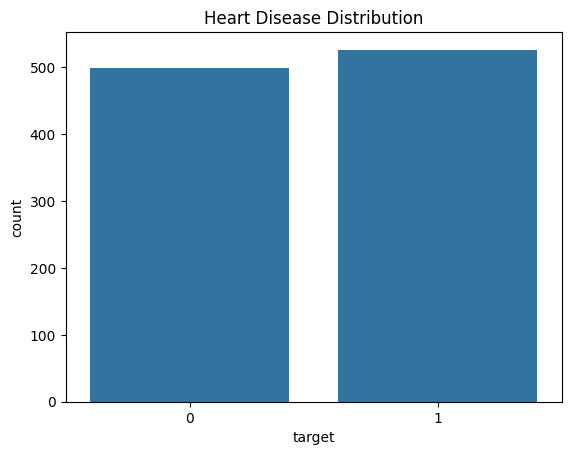

In [7]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

In [10]:
df['target'].value_counts()


,count
target,
1,526
0,499


Plot shows how many people have heart disease (1) and how many do not (0). It helps to see whether the dataset is balanced

**Correlation Heatmap**

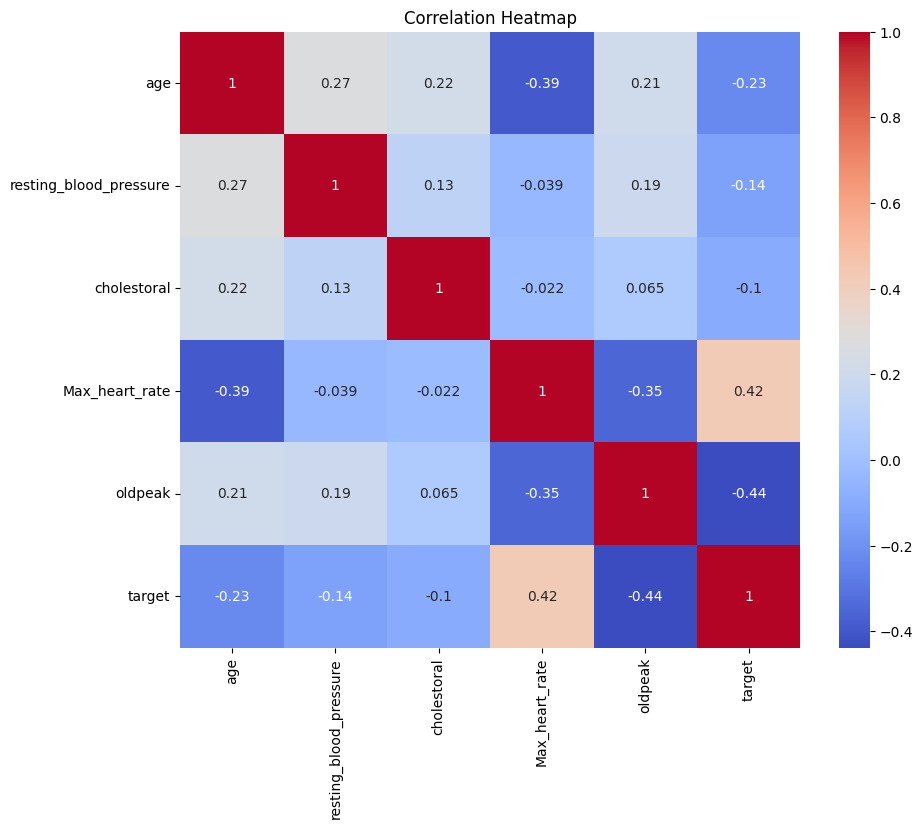

In [9]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Create a correlation heatmap to understand the relationship between numerical features in the dataset. First,set the figure size to make the plot larger and easier to read. Then,select only numeric columns from the dataset because correlation can only be calculated on numerical data. After that,use seaborn’s heatmap function to display the correlation matrix

**Features and Target**

In [11]:
X = df.drop("target", axis=1)
y = df["target"]

In [14]:
X = pd.get_dummies(X, drop_first=True)


Separate input features (X) from the target variable (y). The target column tells whether a person has heart disease

**Train-Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Split the dataset into training and testing sets. 80% is used for training and 20% for testing

**Train Logistic Regression Model**

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Make Predictions**

In [17]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


Model predicts whether a person has heart disease.Also calculate prediction probabilities for ROC curve

**Model Evaluation**

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8146341463414634


Accuracy shows how many predictions were correct out of total predictions

**Confusion Matrix**

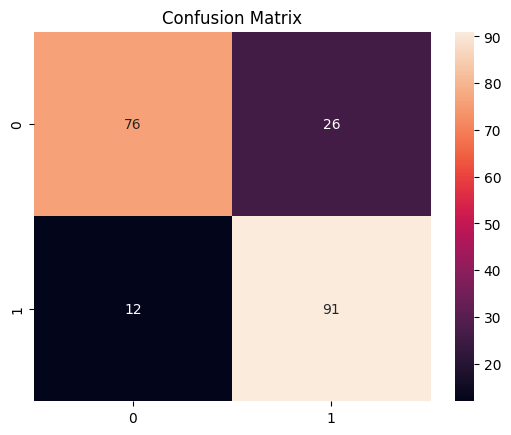

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


**ROC Curve**

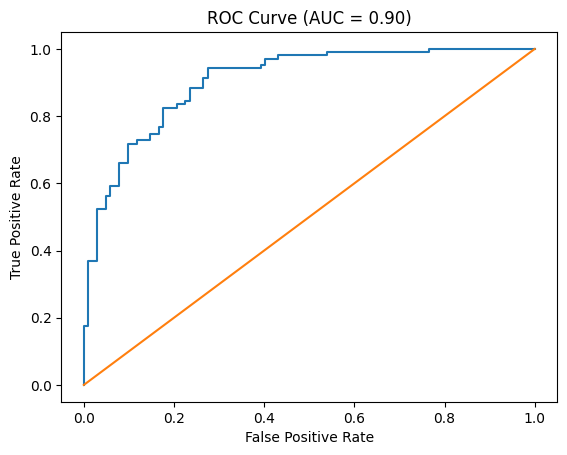

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.title(f"ROC Curve (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


The ROC curve shows model performance at different thresholds.
AUC (Area Under Curve) closer to 1 means better performance

**Feature Importance**

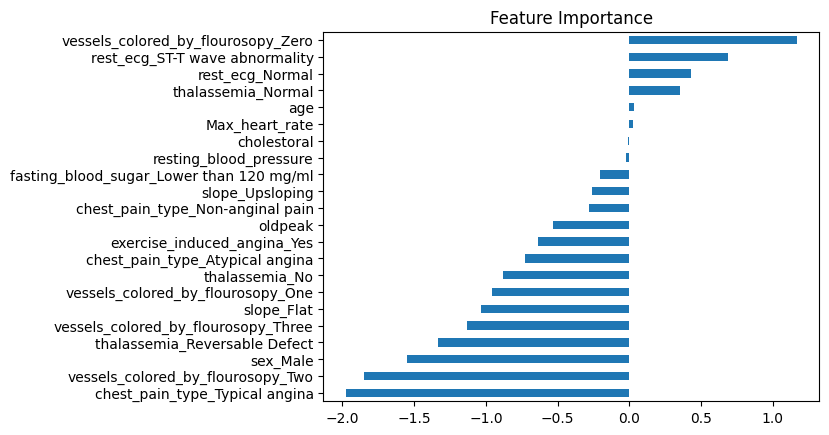

In [21]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


Features most influence heart disease prediction. Larger values mean stronger impact